In [2]:
#Import package for a Data Frame
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Import package for Visualitation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [3]:
df_review= pd.read_csv('clean df review.csv')
df_playstore = pd.read_csv('clean_playstore.csv')

print(df_review)
print(df_playstore)

                                  App  \
0               10 Best Foods for You   
1               10 Best Foods for You   
2               10 Best Foods for You   
3               10 Best Foods for You   
4               10 Best Foods for You   
...                               ...   
37422  Housing-Real Estate & Property   
37423  Housing-Real Estate & Property   
37424  Housing-Real Estate & Property   
37425  Housing-Real Estate & Property   
37426  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2             Works great especially going grocery store  Positive   
3                                           Best idea us  Positive   
4                                               Best way  Positive   
...                                                  ...       ...   
37422  Most ads o

In [4]:
#Searching for a best app on Playstore

df_playstore['Rating'] = df_playstore['Rating'].apply(lambda x: float(x))
df_playstore['Reviews'] = df_playstore['Reviews'].apply(lambda x: int(x))

newdf_rate=df_playstore[['App','Prim_Genre','Sec_Genre','Rating','Category','Content Rating','Type','Price']].\
groupby(['Rating'], sort = True)
newdf_rate=newdf_rate.filter(lambda x: x['Rating'].mean() >= 4.4)
newdf_rate=newdf_rate.sort_values(by=['Rating'])

newdf_reviews=df_playstore[['App','Reviews']].groupby(['Reviews'], sort = True)
newdf_reviews=newdf_reviews.filter(lambda x: x['Reviews'].mean() >= 255435)
newdf_reviews=newdf_reviews.sort_values(by=['Reviews'])

newdf_installs=df_playstore[['App','Installs']].groupby(['Installs'], sort = True)
newdf_installs=newdf_installs.filter(lambda x: x['Installs'].mean() >= 10000000)
newdf_installs=newdf_installs.sort_values(by=['Installs'])

s1 = pd.merge(newdf_reviews, newdf_rate, how='inner', on=['App'])
best_apps = pd.merge(s1, newdf_installs, how='inner', on=['App'])
best_apps

,App,Reviews,Prim_Genre,Sec_Genre,Rating,Category,Content Rating,Type,Price,Installs
0,TRANSFORMERS: Earth Wars,256219,Strategy,Strategy,4.5,FAMILY,Everyone,Free,0.0,10000000
1,Pocket,256680,News & Magazines,News & Magazines,4.5,NEWS_AND_MAGAZINES,Everyone,Free,0.0,10000000
2,Shooting King,257724,Sports,Sports,4.4,GAME,Everyone 10+,Free,0.0,10000000
3,Video Player All Format,258277,Video Players & Editors,Video Players & Editors,4.8,VIDEO_PLAYERS,Everyone,Free,0.0,10000000
4,Video Player All Format,258277,Video Players & Editors,Video Players & Editors,4.8,VIDEO_PLAYERS,Everyone,Free,0.0,10000000
...,...,...,...,...,...,...,...,...,...,...
5587,WhatsApp Messenger,69109672,Communication,Communication,4.4,COMMUNICATION,Everyone,Free,0.0,1000000000
5588,WhatsApp Messenger,69119316,Communication,Communication,4.4,COMMUNICATION,Everyone,Free,0.0,1000000000
5589,WhatsApp Messenger,69119316,Communication,Communication,4.4,COMMUNICATION,Everyone,Free,0.0,1000000000
5590,WhatsApp Messenger,69119316,Communication,Communication,4.4,COMMUNICATION,Everyone,Free,0.0,1000000000


In [5]:
best_apps.App.unique()

array(['TRANSFORMERS: Earth Wars', 'Pocket', 'Shooting King',
       'Video Player All Format', 'LightX Photo Editor & Photo Effects',
       'Music - Mp3 Player',
       'Hotels.com: Book Hotel Rooms & Find Vacation Deals',
       'Amber Weather', 'Geometry Dash SubZero', 'Rush',
       'CM Security Lite - Antivirus', 'Build a Bridge!',
       'Agoda – Hotel Booking Deals', 'Dictionary',
       'Heart of Vegas™ Slots – Free Slot Casino Games',
       'Slot Machines by IGG', 'Background Eraser',
       'No. Color - Color by Number, Number Coloring',
       'Peak – Brain Games & Training',
       'Six Pack in 30 Days - Abs Workout',
       'Wallpapers HD, 4K Backgrounds', 'Run Sausage Run!',
       'Shopfully - Weekly Ads & Deals', 'Weather 14 Days',
       'Jewels Legend - Match 3 Puzzle', 'Boomerang Make and Race',
       'LiveScore: Live Sport Updates', 'Al-Moazin Lite (Prayer Times)',
       'Stocard - Rewards Cards Wallet', 'Photo Collage - Layout Editor',
       'Tiny Scanner - PD

Text(0.5, 1.0, 'Total of best apps in each category')

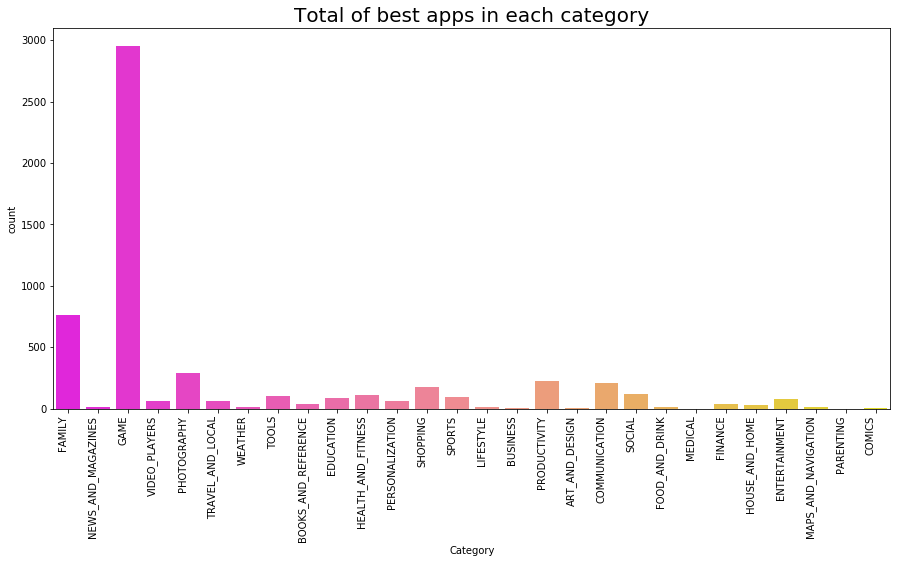

In [6]:
#Visualtization by total app by each category
rcParams['figure.figsize'] = 15,7
category_plot = sns.countplot(x="Category",data=best_apps, palette = "spring")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
category_plot 
plt.title('Total of best apps in each category',size = 20)

#print(best_apps['Category'].value_counts())

--- The result from a best apps the outstanding category are Game for most downloaded categories.

Text(0.5, 1.0, 'Content Rating distribution')

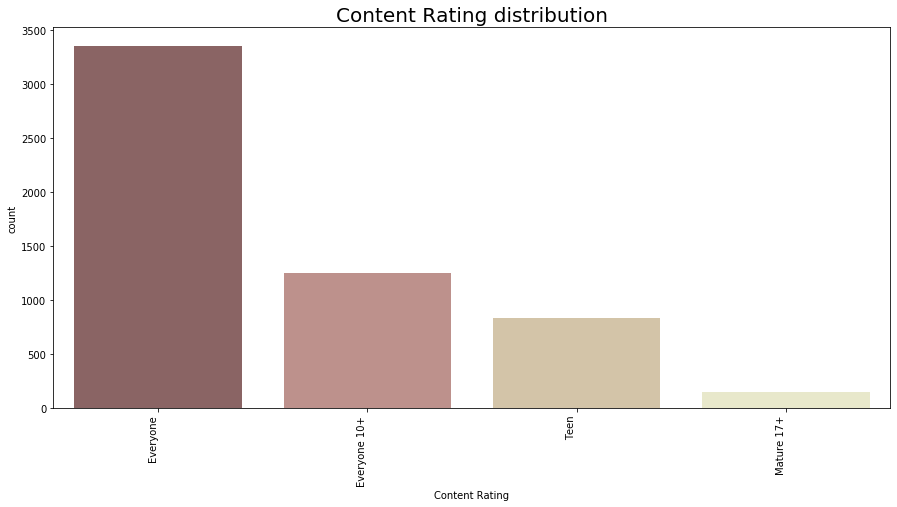

In [7]:
#Visualize the the count of content rating from best apps
#print(best_apps['Content Rating'].value_counts())
rcParams['figure.figsize'] = 15,7
content_plot = sns.countplot(x="Content Rating",data=best_apps, palette = "pink")
content_plot.set_xticklabels(content_plot.get_xticklabels(), rotation=90, ha="right")
content_plot 
plt.title('Content Rating distribution',size = 20)

--- Content rating **Everyone** and **Everyone10+** have the majority of the best apps

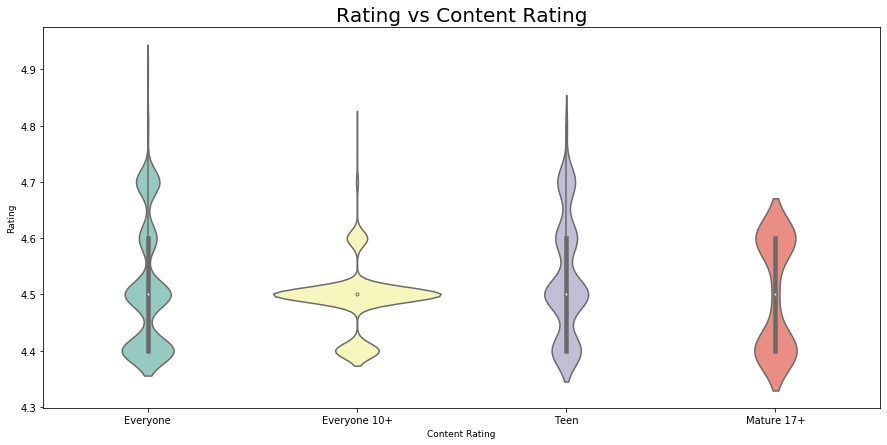

In [8]:
#Visualize the rating vs content rating distribution
content_ratings = sns.violinplot(x="Content Rating",y="Rating",data=best_apps, kind="box", height = 10 ,palette = "Set3")
content_ratings.set_xlabel(xlabel = 'Content Rating', fontsize = 9)
content_ratings.set_ylabel(ylabel = 'Rating', fontsize = 9)
content_ratings.set_title(label = 'Rating vs Content Rating', fontsize = 20)
plt.show()

--- Most the rating distribute well in the content rating **everyone** that make a visualize more like violin than any other

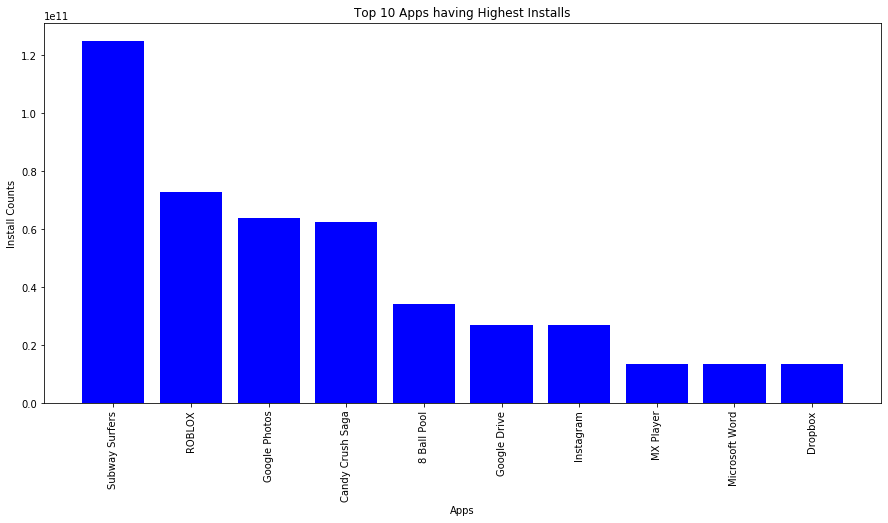

In [9]:
#App with the largest number of installs
res = best_apps.groupby('App')['Installs'].sum().reset_index()
final_result = res.sort_values(by = 'Installs', ascending = False).head(10)

plt.bar("App", "Installs", data = final_result, color = "blue")
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Install Counts")
plt.title("Top 10 Apps having Highest Installs")
plt.show()

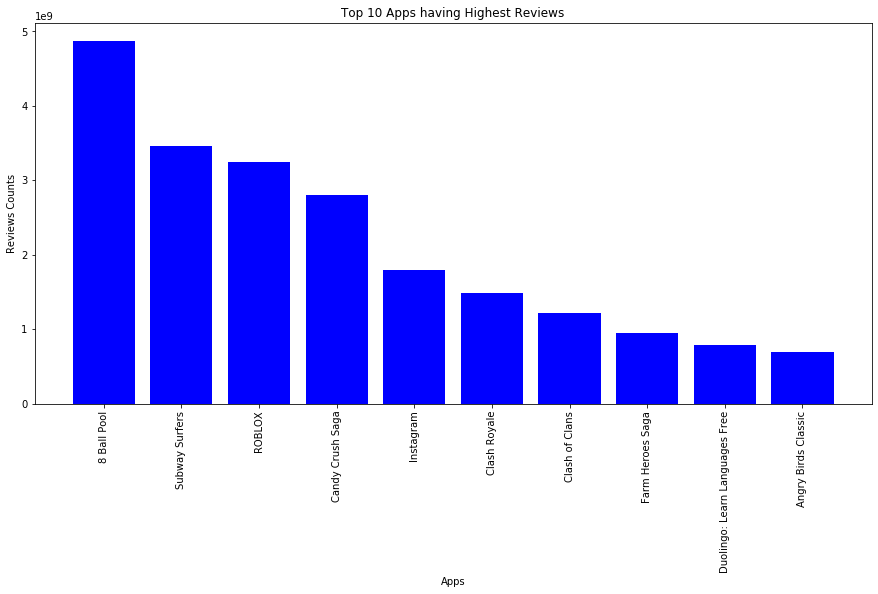

In [10]:
res = best_apps.groupby('App')['Reviews'].sum().reset_index()
final_result = res.sort_values(by = 'Reviews', ascending = False).head(10)

plt.bar("App", "Reviews", data = final_result, color = "blue")
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Reviews Counts")
plt.title("Top 10 Apps having Highest Reviews")
plt.show()

**Subway Surfer** become the app most install and **8 Ball Pool** have the most review. we do realize that Game category have a significant domination for now. 

In [11]:
#Searching for less popular App under 500,000 installation
df_playstore['Rating'] = df_playstore['Rating'].apply(lambda x: float(x))
df_playstore['Reviews'] = df_playstore['Reviews'].apply(lambda x: int(x))

newdf_rate=df_playstore[['App','Prim_Genre','Sec_Genre','Rating','Category','Content Rating','Type','Price']].\
groupby(['Rating'], sort = True)
newdf_rate=newdf_rate.filter(lambda x: x['Rating'].mean() >= 4)
newdf_rate=newdf_rate.sort_values(by=['Rating'])

newdf_reviews=df_playstore[['App','Reviews']].groupby(['Reviews'], sort = True)
newdf_reviews=newdf_reviews.filter(lambda x: x['Reviews'].mean() >= 50000)
newdf_reviews=newdf_reviews.sort_values(by=['Reviews'])

newdf_installs=df_playstore[['App','Installs']].groupby(['Installs'], sort = True)
newdf_installs=newdf_installs.filter(lambda x: x['Installs'].mean() <= 5000000)
newdf_installs=newdf_installs.sort_values(by=['Installs'])

s1 = pd.merge(newdf_reviews, newdf_rate, how='inner', on=['App'])
df2 = pd.merge(s1, newdf_installs, how='inner', on=['App'])
df2

,App,Reviews,Prim_Genre,Sec_Genre,Rating,Category,Content Rating,Type,Price,Installs
0,DraftKings - Daily Fantasy Sports,50017,Sports,Sports,4.5,SPORTS,Adults only 18+,Free,0.0,1000000
1,Masha and The Bear Jam Day Match 3 games for kids,50060,Puzzle,Brain Games,4.6,FAMILY,Everyone,Free,0.0,1000000
2,Calorie Counter - EasyFit free,50294,Health & Fitness,Health & Fitness,4.7,HEALTH_AND_FITNESS,Everyone,Free,0.0,1000000
3,"Journey - Diary, Journal",50338,Lifestyle,Lifestyle,4.6,LIFESTYLE,Everyone,Free,0.0,1000000
4,"LALALAB prints your photos, photobooks and mag...",50424,Photography,Photography,4.7,PHOTOGRAPHY,Everyone,Free,0.0,1000000
...,...,...,...,...,...,...,...,...,...,...
1341,Castle Clash: Epic Empire ES,584070,Strategy,Strategy,4.6,FAMILY,Everyone 10+,Free,0.0,5000000
1342,FINAL FANTASY BRAVE EXVIUS,745684,Role Playing,Role Playing,4.6,GAME,Teen,Free,0.0,5000000
1343,"Fame Boom for Real Followers, Likes",896118,Social,Social,4.7,SOCIAL,Everyone,Free,0.0,5000000
1344,Chess Free,1375988,Board,Brain Games,4.3,FAMILY,Everyone,Free,0.0,5000000


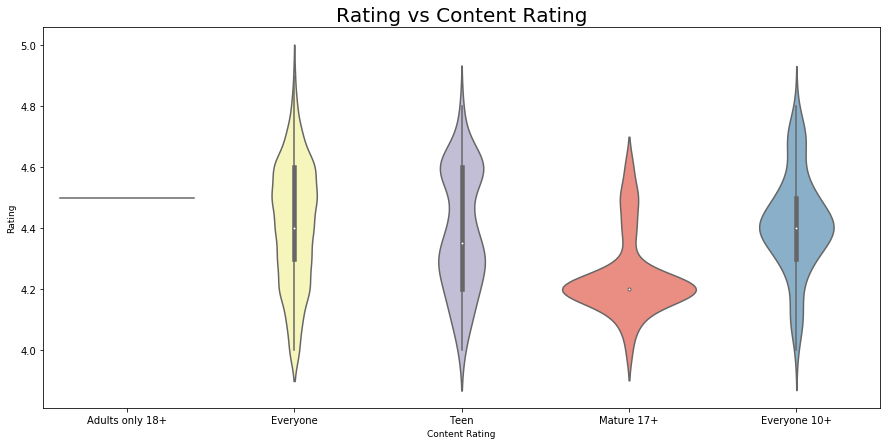

In [12]:
#Visualize the rating vs content rating distribution
content_ratings = sns.violinplot(x="Content Rating",y="Rating",data=df2, kind="box", height = 10 ,palette = "Set3")
content_ratings.set_xlabel(xlabel = 'Content Rating', fontsize = 9)
content_ratings.set_ylabel(ylabel = 'Rating', fontsize = 9)
content_ratings.set_title(label = 'Rating vs Content Rating', fontsize = 20)
plt.show()

The rating distribution by content rating sees, that **Teen** and **Everyone 10+** have more stabil distribution than other content.

Text(0.5, 1.0, 'Content Rating distribution')

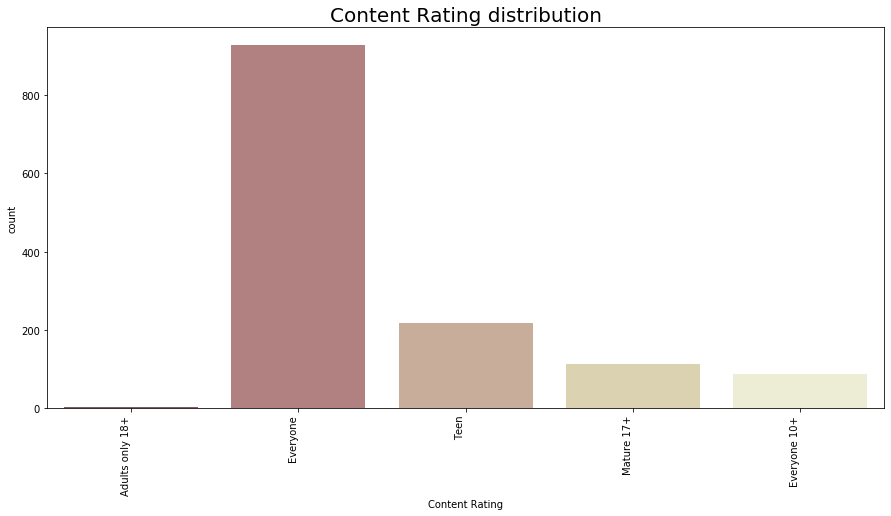

In [13]:
#Visualize the the count of content rating from best apps
#print(best_apps['Content Rating'].value_counts())
rcParams['figure.figsize'] = 15,7
content_plot = sns.countplot(x="Content Rating",data=df2, palette = "pink")
content_plot.set_xticklabels(content_plot.get_xticklabels(), rotation=90, ha="right")
content_plot 
plt.title('Content Rating distribution',size = 20)

On the other hand, count of the content rating shown that the app with a content rating **Everyone** have a lead than any other content rating.

Text(0.5, 1.0, 'Total of less popular apps in each category')

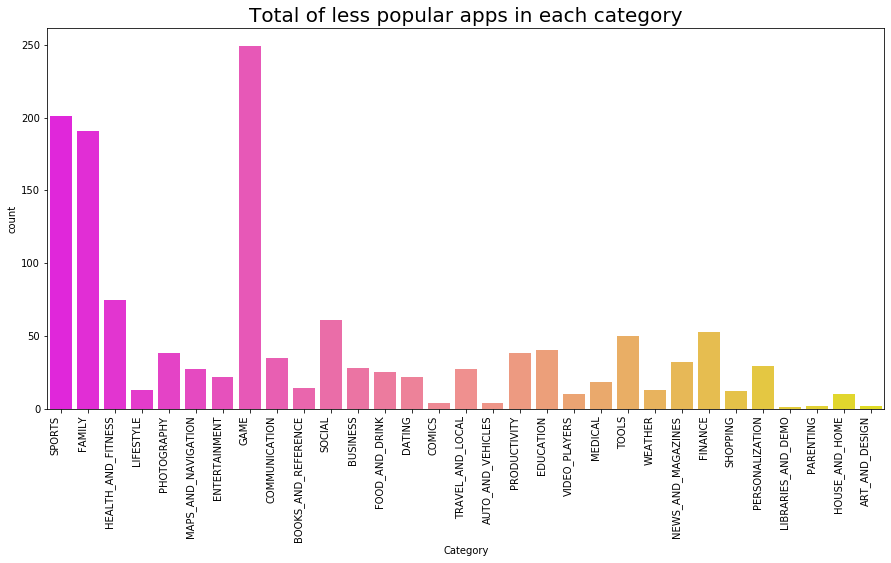

In [14]:
#Visualtization by total app by each category
rcParams['figure.figsize'] = 15,7
category_plot = sns.countplot(x="Category",data=df2, palette = "spring")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
category_plot 
plt.title('Total of less popular apps in each category',size = 20)

#print(best_apps['Category'].value_counts())

The total of best apps by category are not so different from total of best apps from a visualize earlier. with the stand out is **Game**. but **Sports** and **Family** category are follow behind closely to each other.

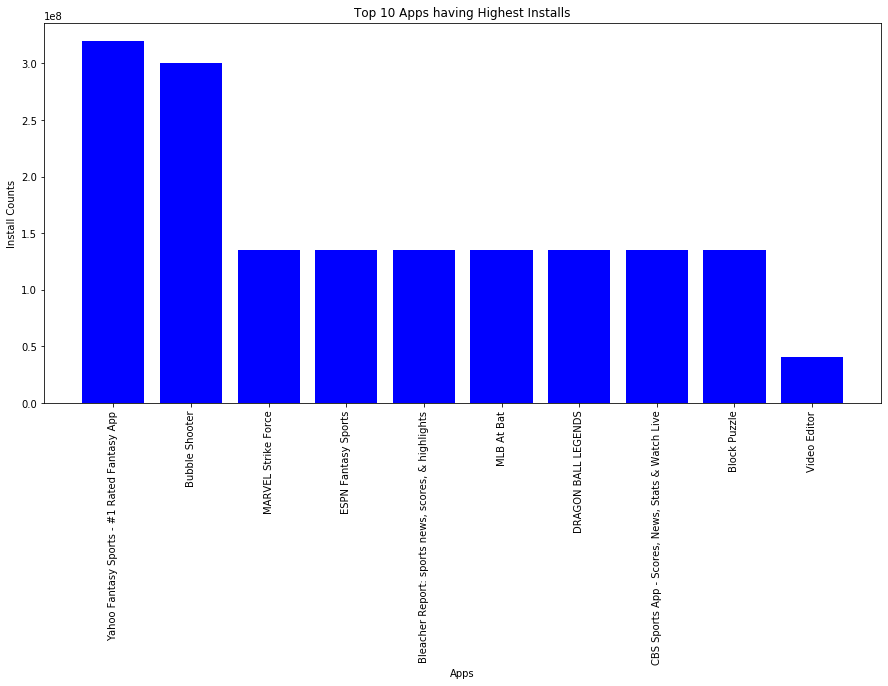

In [22]:
#App with the largest number of installs
res = df2.groupby('App')['Installs'].sum().reset_index()
final_result = res.sort_values(by = 'Installs', ascending = False).head(10)

plt.bar("App", "Installs", data = final_result, color = "blue")
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Install Counts")
plt.title("Top 10 Apps having Highest Installs")
plt.show()

The game with highest install from this less app category is **Yahoo Fantasy Sport -#1 Rated Fantasy App** and in the second place is **Bubble Shooter**

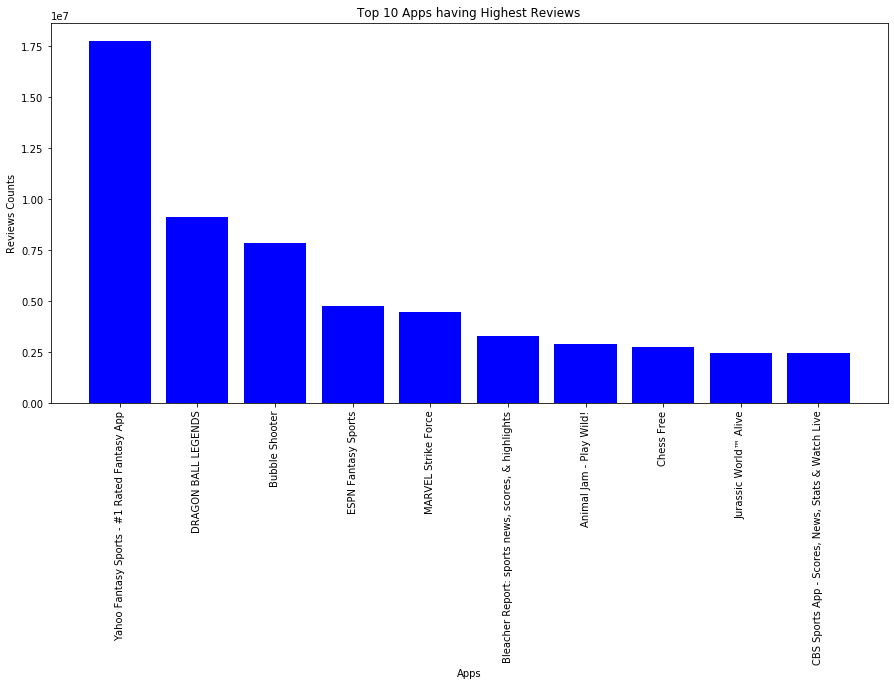

In [16]:
res = df2.groupby('App')['Reviews'].sum().reset_index()
final_result2 = res.sort_values(by = 'Reviews', ascending = False).head(10)

plt.bar("App", "Reviews", data = final_result, color = "blue")
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Reviews Counts")
plt.title("Top 10 Apps having Highest Reviews")
plt.show()

**Yahoo Fantasy Sport -#1 Rated Fantasy App** also have the most review app by far than any other app for now.

In [17]:
#Working on Sentiment Analysis merging with less popular app set into one by App!!
merged_df = pd.merge(df2, df_review, on='App', how = "inner")
print(merged_df)

                                     App  Reviews    Prim_Genre     Sec_Genre  \
0      DraftKings - Daily Fantasy Sports    50017        Sports        Sports   
1      DraftKings - Daily Fantasy Sports    50017        Sports        Sports   
2      DraftKings - Daily Fantasy Sports    50017        Sports        Sports   
3      DraftKings - Daily Fantasy Sports    50017        Sports        Sports   
4      DraftKings - Daily Fantasy Sports    50017        Sports        Sports   
...                                  ...      ...           ...           ...   
31203         FINAL FANTASY BRAVE EXVIUS   745684  Role Playing  Role Playing   
31204         FINAL FANTASY BRAVE EXVIUS   745684  Role Playing  Role Playing   
31205         FINAL FANTASY BRAVE EXVIUS   745684  Role Playing  Role Playing   
31206         FINAL FANTASY BRAVE EXVIUS   745684  Role Playing  Role Playing   
31207         FINAL FANTASY BRAVE EXVIUS   745684  Role Playing  Role Playing   

       Rating Category   Co

In [18]:
print(merged_df['Sentiment'].value_counts())

Positive    21324
Negative     7855
Neutral      2029
Name: Sentiment, dtype: int64


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

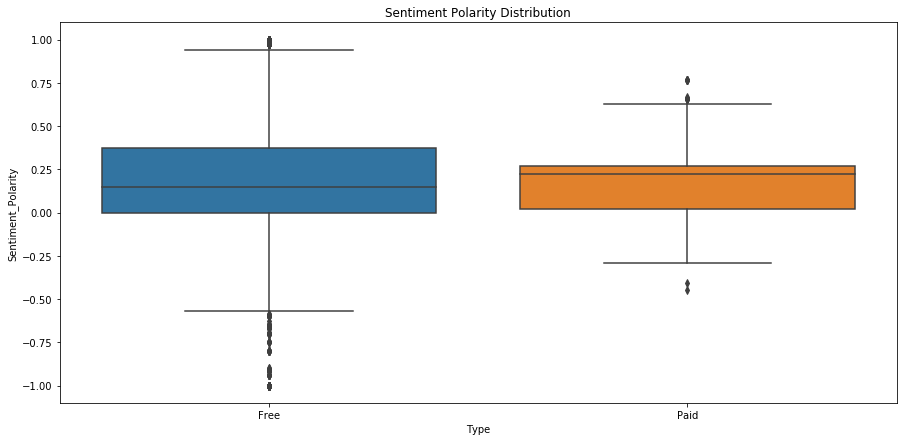

In [19]:
# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

Text(0.5, 1, 'Sentiment Polarity Distribution')

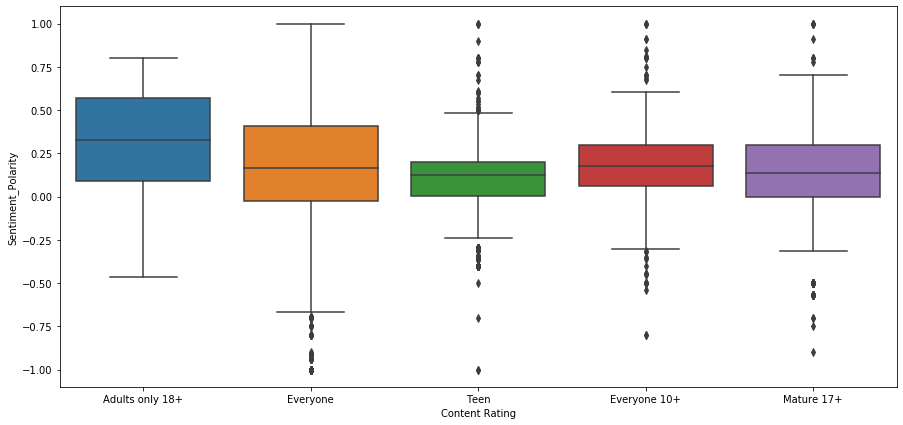

In [28]:
#Sentiment Polarity for Installs
ac = sns.boxplot(x = 'Content Rating', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

In [81]:
final_result3

,App,Installs,Reviews
23,Bubble Shooter,43500000000,1140691800
27,"CBS Sports App - Scores, News, Stats & Watch Live",25920000000,471915072
45,DRAGON BALL LEGENDS,22545000000,1524653721
19,Block Puzzle,20790000000,248871546
100,HotelTonight: Book amazing deals at great hotels,5080000000,58485532
99,Hopper - Watch & Book Flights,3040000000,31633328
34,"Calm - Meditate, Sleep, Relax",2600000000,57955300
53,DisneyNOW – TV Shows & Games,2520000000,41572440
88,H TV,1560000000,32158152
39,Chrome Dev,1560000000,19830564


In [86]:
#1 = merged_df.loc[merged_df.App == 'Bubble Shooter'].head(1)
#2 = merged_df.loc[merged_df.App == 'CBS Sports App - Scores, News, Stats & Watch Live'].head(1)
#3 = merged_df.loc[merged_df.App == 'DRAGON BALL LEGENDS'].head(1)
#4 = merged_df.loc[merged_df.App == 'Block Puzzle'].head(1)
#5 = merged_df.loc[merged_df.App == 'Bubble Shooter'].head(1)